## Saikiran N. Pasikanti
### Time series

Data Source: https://www.transtats.bts.gov/TRAFFIC/<br>

Selections:
Date: Oct 2002 to Oct 2017
Geographic Area: System (domestic and international)
Schedule Type: Total
Operating Statistics: Revenue Passenger Miles

(Revenue passenger miles are calculated by multiplying the number of paying passengers by the distance traveled. For example, an airplane with 100 passengers that flies 250 miles has generated 25,000 RPMs.)

Problem Statement:
1. How the data changes from month to month, year to year?
Any trend?
How fluctuated the curve is?
Any seasonal effects?
Any unusual years/months which have significantly small or large number?
2. Forecast future value based on the time series?

In [3]:
## Air Traffic Control Chart 
setwd("C:\\Users\\saikiran\\Documents\\GitHub\\Advanced Statistics Using R") 
temp <- read.csv("USCarrier_Traffic_20180128011624.csv", skip=3) 

head(temp) 

Period,Total
October 2002,54019748
November 2002,50105232
December 2002,56656594
January 2003,51197175
February 2003,47040806
March 2003,56765848


In [6]:
dataset <- as.data.frame(temp[-182,], names=T) 
class(dataset$Total) 
dataset$Total <- as.numeric(as.character(dataset$Total)) 
dataset$Total 
str(dataset) 

[1] "factor"

[1] 54019748 50105232 56656594 51197175 47040806 56765848 51857179 54335598
  [9] 60272900 65962215 64989766 52121480 56724442 54128776 58739845 53979780
 [17] 53179685 64035863 62340117 62530704 68866389 73335888 70961513 57881031
 [25] 63021122 59453941 62680310 59629608 55795165 70595861 65145550 68268899
 [33] 72952958 77432998 73778917 62046797 63640895 61518984 64289340 61035027
 [41] 56729212 70799794 68120558 69352605 74085927 77798585 74227040 62345732
 [49] 66082158 63548729 65980779 63016013 57793832 72700241 69836156 71933109
 [57] 76926452 80988340 79439827 65913298 69445349 66250428 67782533 64667106
 [65] 61504426 74575531 68906881 72725749 76162104 79707545 77300567 61198749
 [73] 65018204 58512623 63503416 58373783 53506580 66027341 65166298 65868253
 [81] 71350226 77136797 74614770 61435354 64274739 59011015 63231672 59651061
 [89] 53240065 68307089 64953249 68850904 74474550 79304441 76741308 65341294
 [97] 69071625 63334290 65797939 61630362 55391206 70158268 67683558 71711447
[105] 76057910 81423230 77247893 66345317 68177878 63492941 66595642 61940192
[113] 58243794 71696202 68668302 71887531 76760758 80499331 78609006 66007760
[121] 67677764 64039209 66702988 63139218 58109870 72764478 68453537 73574534
[129] 78467131 81974582 80007788 67203059 69727370 63611195 70967038 64743622
[137] 58474895 74237172 71278692 75712694 80063355 84404541 81957559 69028857
[145] 71887841 65654285 72233639 66538427 60331343 76271051 73607258 78502353
[153] 83253406 88951665 85855967 73017729 76678056 70460064 75327875 69778658
[161] 65026219 79121758 75617423 81226985 87042101 91256833 86708517 75735169
[169] 77790769 72625058 77310977 71863052 64648038 81276185 79917608 83921422
[177] 90112473 94623610 90963785 75075798 81141740

'data.frame':	181 obs. of  2 variables:
 $ Period: Factor w/ 182 levels "April 2003","April 2004",..: 151 136 31 61 46 106 1 121 91 76 ...
 $ Total : num  54019748 50105232 56656594 51197175 47040806 ...


In [12]:
### Data for Time Series #### 
airtraf <- dataset[,-1] 
airtraf 
## time series object ## With reference to "dataset" observations are from October 2002 to October 2017 

[1] 54019748 50105232 56656594 51197175 47040806 56765848 51857179 54335598
  [9] 60272900 65962215 64989766 52121480 56724442 54128776 58739845 53979780
 [17] 53179685 64035863 62340117 62530704 68866389 73335888 70961513 57881031
 [25] 63021122 59453941 62680310 59629608 55795165 70595861 65145550 68268899
 [33] 72952958 77432998 73778917 62046797 63640895 61518984 64289340 61035027
 [41] 56729212 70799794 68120558 69352605 74085927 77798585 74227040 62345732
 [49] 66082158 63548729 65980779 63016013 57793832 72700241 69836156 71933109
 [57] 76926452 80988340 79439827 65913298 69445349 66250428 67782533 64667106
 [65] 61504426 74575531 68906881 72725749 76162104 79707545 77300567 61198749
 [73] 65018204 58512623 63503416 58373783 53506580 66027341 65166298 65868253
 [81] 71350226 77136797 74614770 61435354 64274739 59011015 63231672 59651061
 [89] 53240065 68307089 64953249 68850904 74474550 79304441 76741308 65341294
 [97] 69071625 63334290 65797939 61630362 55391206 70158268 67683558 71711447
[105] 76057910 81423230 77247893 66345317 68177878 63492941 66595642 61940192
[113] 58243794 71696202 68668302 71887531 76760758 80499331 78609006 66007760
[121] 67677764 64039209 66702988 63139218 58109870 72764478 68453537 73574534
[129] 78467131 81974582 80007788 67203059 69727370 63611195 70967038 64743622
[137] 58474895 74237172 71278692 75712694 80063355 84404541 81957559 69028857
[145] 71887841 65654285 72233639 66538427 60331343 76271051 73607258 78502353
[153] 83253406 88951665 85855967 73017729 76678056 70460064 75327875 69778658
[161] 65026219 79121758 75617423 81226985 87042101 91256833 86708517 75735169
[169] 77790769 72625058 77310977 71863052 64648038 81276185 79917608 83921422
[177] 90112473 94623610 90963785 75075798 81141740

In [13]:
## All the 12 months data has been provided 
AT <- ts(airtraf, start=c(2002,10), end =c(2017,10), frequency = 12 ) 
print(AT) 

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2002                                                                        
2003 51197175 47040806 56765848 51857179 54335598 60272900 65962215 64989766
2004 53979780 53179685 64035863 62340117 62530704 68866389 73335888 70961513
2005 59629608 55795165 70595861 65145550 68268899 72952958 77432998 73778917
2006 61035027 56729212 70799794 68120558 69352605 74085927 77798585 74227040
2007 63016013 57793832 72700241 69836156 71933109 76926452 80988340 79439827
2008 64667106 61504426 74575531 68906881 72725749 76162104 79707545 77300567
2009 58373783 53506580 66027341 65166298 65868253 71350226 77136797 74614770
2010 59651061 53240065 68307089 64953249 68850904 74474550 79304441 76741308
2011 61630362 55391206 70158268 67683558 71711447 76057910 81423230 77247893
2012 61940192 58243794 71696202 68668302 71887531 76760758 80499331 78609006
2013 63139218 58109870 72764478 68453537 73574534 78467131 81974582 80007788

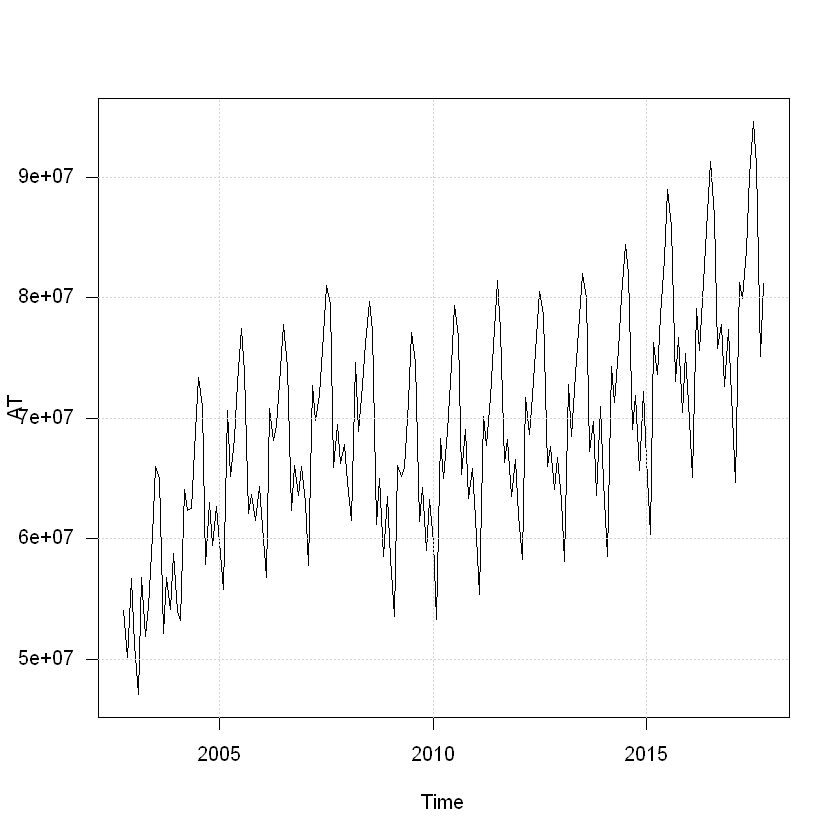

In [14]:
plot(AT,las=1) 
grid()

The plot clear shows that it is non-stationary series.
We can see from the time plot that this time series could probably be described using an additive model, since the random fluctuations in the data are roughly constant in size over time.

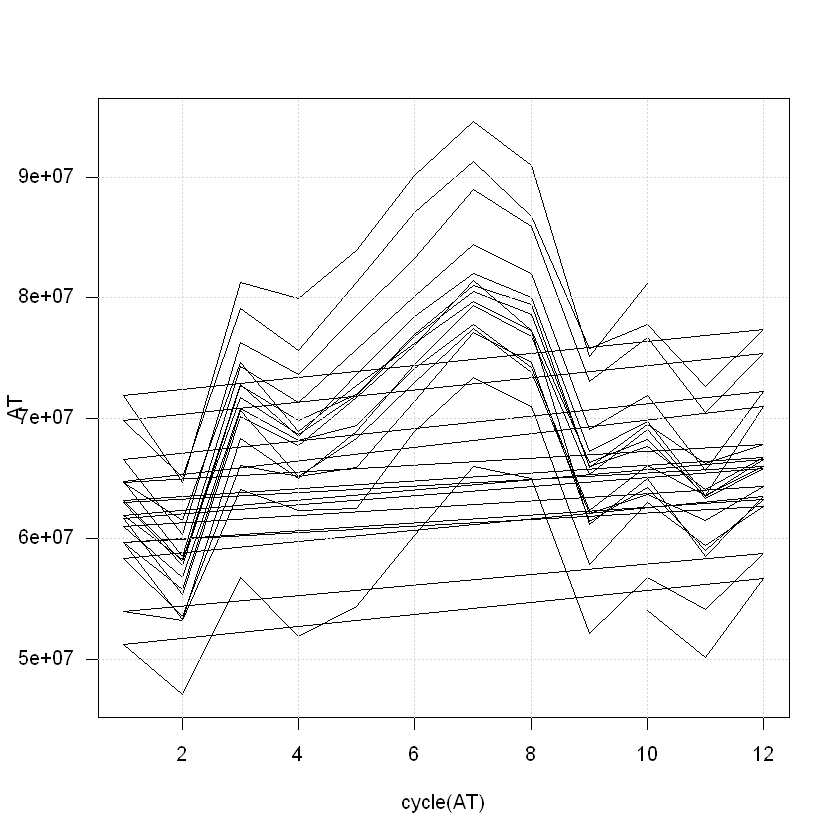

In [16]:
plot(cycle(AT),AT, type="l", las=1) 
grid()

From April to July – total revenue passenger miles increasing linearly.
From December to February – total revenue passenger miles decreasing linearly.
February and September – has sudden down points.
While March and July – peak revenue passenger miles.
From Year to Year – the revenue shows a secular upward trend

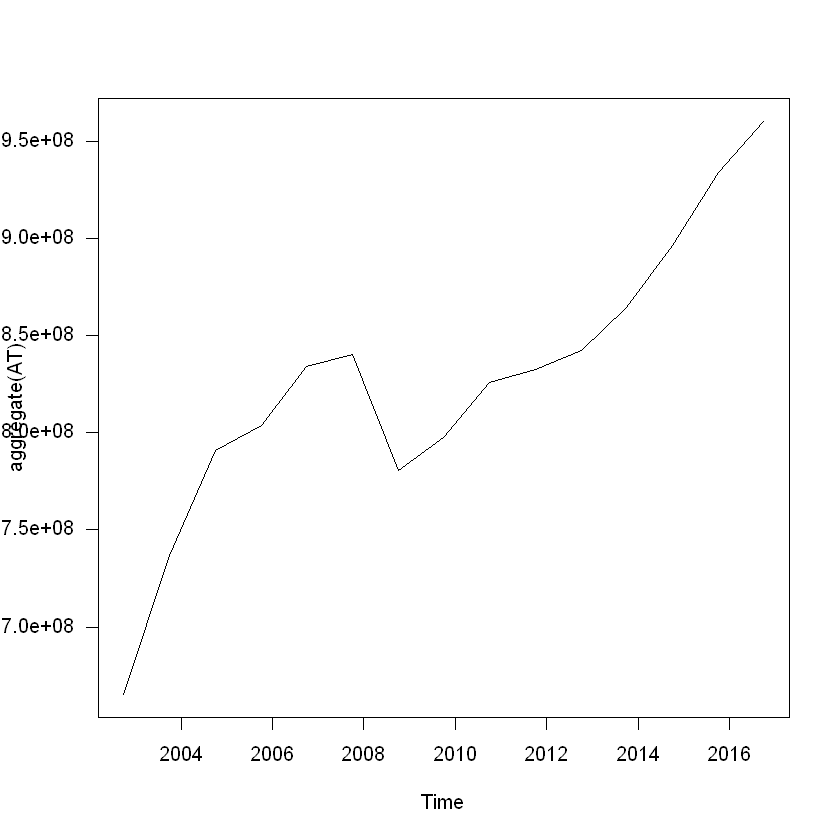

In [17]:
plot(aggregate(AT), las=1)

[1] 51197175 56765848 51857179 79917608 54335598 83921422 60272900 90112473
 [9] 65962215 94623610 90963785 52121480 81141740 50105232

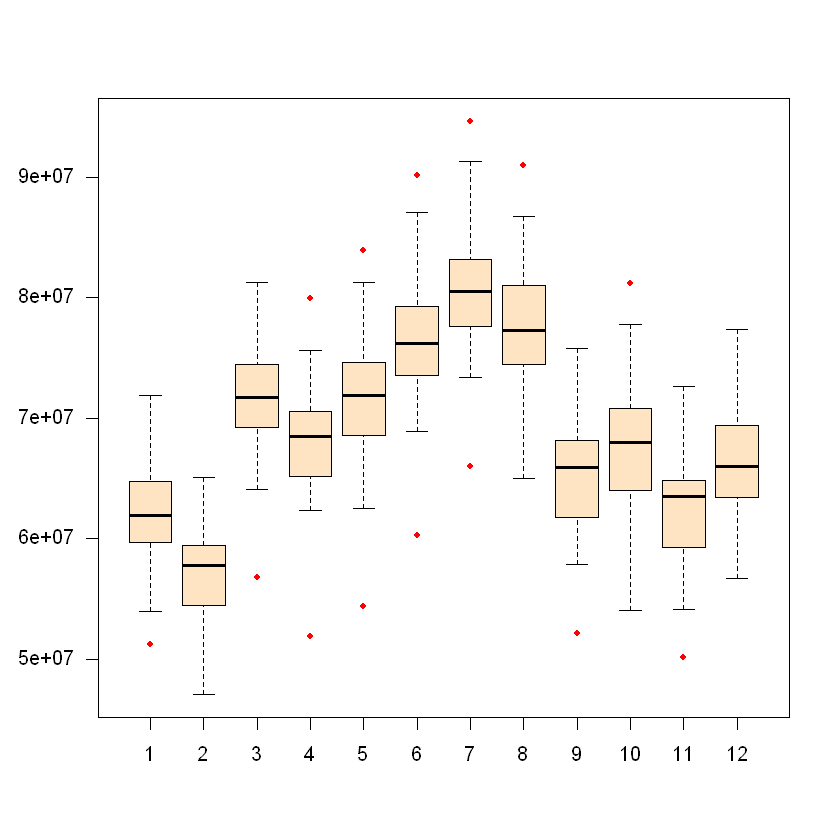

In [19]:
a <- boxplot(AT~cycle(AT),las=1, col="bisque", outcol="red", pch=20) 
a$out

Any unusual years/months which have significantly small or large number?
As seen in the above seasonal boxplot, the list of unsual data are as follows:

So, for above month-years, the total revenue passenger miles records have unsual data points.

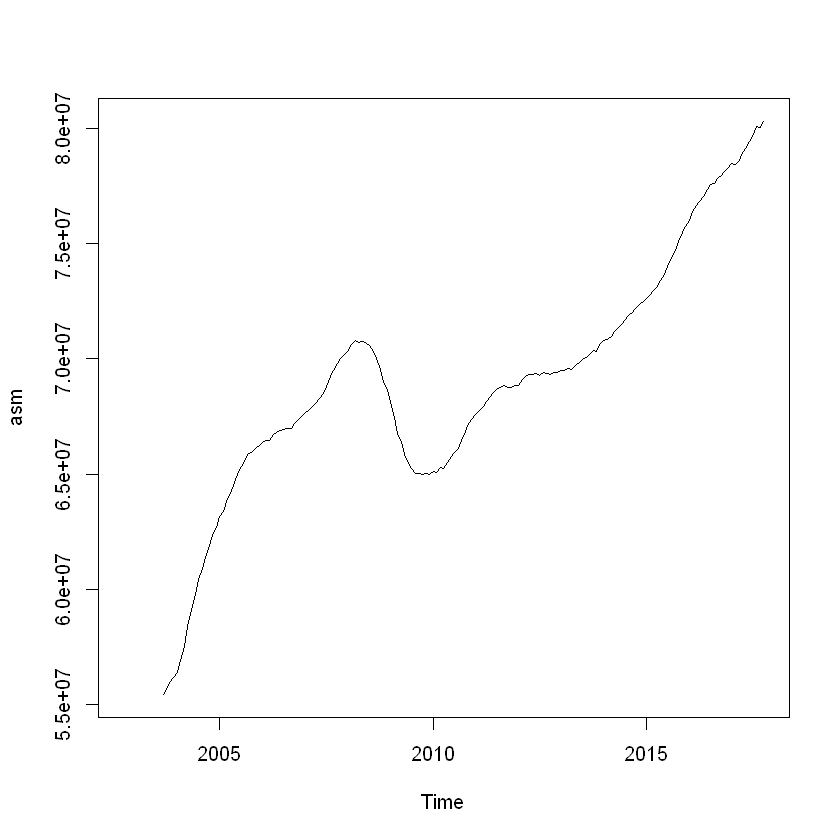

In [20]:
### Smoothed Wavform ##### 
library(TTR) 
asm <- SMA(AT,n=12) 
plot.ts(asm)

$x
          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
2002                                                                        
2003 51197175 47040806 56765848 51857179 54335598 60272900 65962215 64989766
2004 53979780 53179685 64035863 62340117 62530704 68866389 73335888 70961513
2005 59629608 55795165 70595861 65145550 68268899 72952958 77432998 73778917
2006 61035027 56729212 70799794 68120558 69352605 74085927 77798585 74227040
2007 63016013 57793832 72700241 69836156 71933109 76926452 80988340 79439827
2008 64667106 61504426 74575531 68906881 72725749 76162104 79707545 77300567
2009 58373783 53506580 66027341 65166298 65868253 71350226 77136797 74614770
2010 59651061 53240065 68307089 64953249 68850904 74474550 79304441 76741308
2011 61630362 55391206 70158268 67683558 71711447 76057910 81423230 77247893
2012 61940192 58243794 71696202 68668302 71887531 76760758 80499331 78609006
2013 63139218 58109870 72764478 68453537 73574534 78467131 81974582 80007

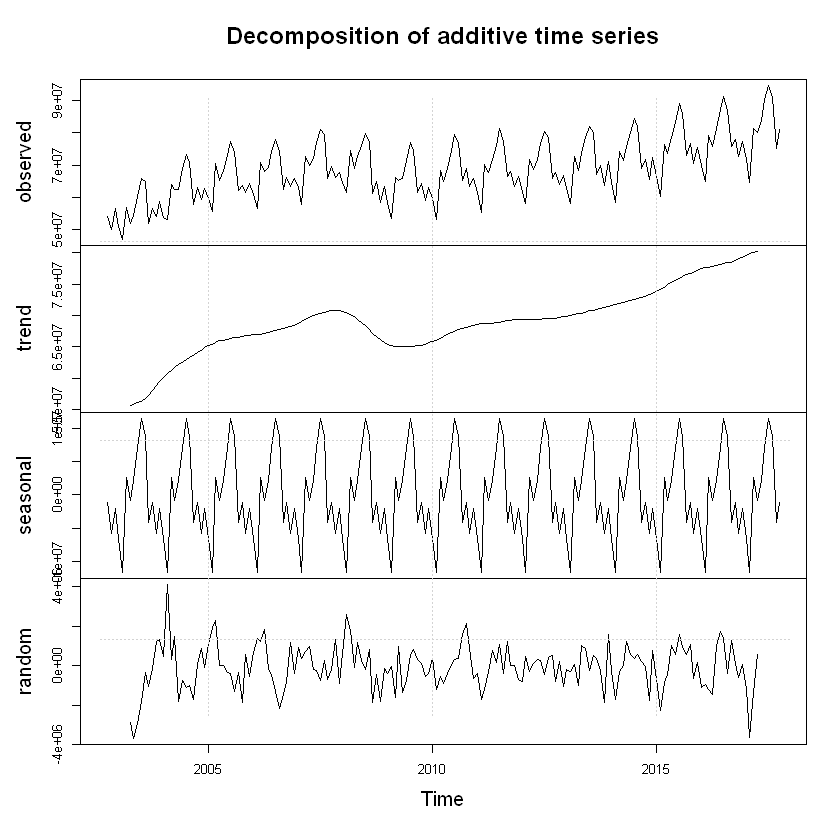

In [22]:
### Decomposing ##### 
ATD <- decompose(AT) 
## type = additive by default, you can use multiplicative also 
ATD 

plot(ATD) 
grid()

Any trend?
Yes, there is a upward trend.
Any seasonal effects?
Yes, there is a seasonal effect observed in the given data
and the seasonal components are:

In [23]:
ATD$seasonal

           Jan       Feb       Mar       Apr       May       Jun       Jul
2002                                                                      
2003  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2004  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2005  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2006  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2007  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2008  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2009  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2010  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2011  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2012  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2013  -6579747 -11600322   2582094   -822307   2196799   7086505  11495015
2014  -6579747 -11600322 

In [24]:
ATD$figure

[1]  -1112045  -5824802  -2037202  -6579747 -11600322   2582094   -822307
 [8]   2196799   7086505  11495015   8685639  -4069626

In [25]:
ATD$type 

[1] "additive"

In [26]:
ATD$random

              Jan          Feb          Mar          Apr          May
2002                                                                 
2003           NA           NA           NA -2876921.325 -3697951.730
2004   452368.702  4116789.862   301747.830  1508059.592 -1804703.105
2005  1061821.493  1959849.071  2287163.705    41855.967    34231.478
2006   696953.285  1377809.029  1234847.663  1845837.467  -127513.688
2007   947117.952   395406.362   753551.371  1005085.550  -169771.355
2008   603421.702  2603819.321  1778083.746  -105261.616  1201373.145
2009  -400487.673   -28092.638 -1587697.920   976778.967 -1330160.813
2010   375383.993 -1193960.929  -560706.129  -872763.158  -374221.022
2011  -396811.298 -1724782.554 -1203078.504  -277982.616   761429.228
2012  -814871.965   491088.112  -281568.004   129835.675   328035.437
2013  -179572.715  -308096.763    56008.580  -985736.075  1048588.437
2014  -278001.215 -1708641.638  -286095.962    -6269.783  1233477.687
2015  -710502.923 -2

How fluctuated the curve is?
For each year, the total revenue passenger miles is widely fluctuating between February and July (approximately by 2000000 for each year).
Submitted by : Saikiran N. Pasikanti

Random fluctuations in the data are roughly constant in size over time.
Seasonal fluctuations are roughly constant in size over time and do not seem to depend on the level of the time series.

In [27]:
#### FORECASTING ####
library(forecast) 
tsdisplay(diff(AT)) 

ERROR: Error in library(forecast): there is no package called 'forecast'


In [ ]:
#### Using ARIMA Model #### 
ATF1 <- arima(AT, order = c(p=2,d=1,q=1)) ATF1 forecast(ATF1, h=12)

In [ ]:
plot(forecast(ATF1, h=12))

In [ ]:
#### Using AUTO ARIMA Model #### 
ATF2 <- auto.arima(AT) plot(forecast(auto.arima(AT), h=12)) ATF2$fitted